In [1]:
import pandas as pd
import os
from IPython.display import display
from PIL import Image
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
csv_path = "/content/drive/MyDrive/DLCV Final Project/Datasets/cat_breeds/data/cats.csv"
df = pd.read_csv(csv_path)


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [6]:
from google.colab import files
files.upload()


Saving kaggle2.json to kaggle2.json


{'kaggle2.json': b'{"username":"bt2509","key":"a171660de339ec98264c41fdfb3d4e44"}'}

## Data downloads

In [7]:
# Install Kaggle API
!pip install -q kaggle

# Create the Kaggle directory
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the Kaggle directory
!cp kaggle2.json ~/.kaggle/

# Set permissions for the file
!chmod 600 ~/.kaggle/kaggle2.json


In [8]:
# Download the dataset using Kaggle API
!kaggle datasets download -d ma7555/cat-breeds-dataset

# Unzip the dataset
!unzip cat-breeds-dataset.zip -d /content/cat_breeds


Streaming output truncated to the last 5000 lines.
  inflating: /content/cat_breeds/images/Tortoiseshell/46495717_25061.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46495784_25049.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46495794_25052.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46496797_24946.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46497000_24936.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46497664_24825.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46500078_24567.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46504471_24003.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46507777_23590.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46510043_23381.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46510643_23331.jpg  
  inflating: /content/cat_breeds/images/Tortoiseshell/46512081_23194.jpg  
  inflating: /content/cat_breeds/images/Tortoises

In [9]:
import os
import random
import json
from PIL import Image

In [10]:
data_dir = "/content/cat_breeds/images"
#data_dir = "/content/drive/MyDrive/Datasets/cat_breeds/images"


In [12]:
# Add after unzipping the dataset
print("Checking dataset structure:")
print(f"Root directory contents: {os.listdir('/content/cat_breeds')}")
print(f"Images directory contents: {os.listdir('/content/cat_breeds/images')[:5]}...")  # Show first 5 items

# Check if CSV file exists and load it
csv_path = "/content/cat_breeds/data/cats.csv"  # Update CSV path
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
    print("\nDataFrame loaded successfully")
    print(f"Number of rows: {len(df)}")
else:
    print(f"CSV file not found at {csv_path}")

Checking dataset structure:
Root directory contents: ['data', 'images']
Images directory contents: ['Oriental Tabby', 'Siberian', 'Korat', 'Silver', 'Ragdoll']...

DataFrame loaded successfully
Number of rows: 67145


In [13]:
selected_breeds = [
    "Domestic Short Hair", "Persian", "Bengal", "Siamese",
    "Calico", "Maine Coon", "Bombay", "Tortoiseshell", "Russian Blue", "Turkish Angora"
]

In [14]:
print("First 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
0,0,46744842,https://www.petfinder.com/cat/arianna-46744842...,Cat,Adult,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
1,1,46717321,https://www.petfinder.com/cat/ozzy-46717321/oh...,Cat,Adult,Male,Extra Large,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
2,2,46626338,https://www.petfinder.com/cat/zena-46626338/ca...,Cat,Senior,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
3,3,46620170,https://www.petfinder.com/cat/mika-46620170/ca...,Cat,Baby,Female,Small,Short,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
4,4,46582751,https://www.petfinder.com/cat/ruby-46582751/fl...,Cat,Young,Female,Medium,NaN,Abyssinian,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [15]:
breed_counts = df['breed'].value_counts()
print("\nNumber of images per breed:")
print(breed_counts)



Number of images per breed:
breed
Domestic Short Hair     4049
Persian                 3999
Domestic Long Hair      3967
American Shorthair      3964
Domestic Medium Hair    3819
                        ... 
Cymric                    17
Burmilla                   8
Canadian Hairless          4
Chinchilla                 3
York Chocolate             1
Name: count, Length: 67, dtype: int64


In [16]:
breed_counts_dict = breed_counts.to_dict()
print("\nNumber of images per breed:")
for breed, count in breed_counts_dict.items():
    print(f"{breed}: {count}")


Number of images per breed:
Domestic Short Hair: 4049
Persian: 3999
Domestic Long Hair: 3967
American Shorthair: 3964
Domestic Medium Hair: 3819
Calico: 3389
Dilute Calico: 3212
Dilute Tortoiseshell: 3144
Siamese: 2695
Ragdoll: 2656
Torbie: 2525
Tuxedo: 2240
Manx: 2048
Bengal: 2044
Tabby: 1989
Russian Blue: 1842
Tortoiseshell: 1625
Bombay: 1618
Snowshoe: 1609
Tiger: 1590
Maine Coon: 1397
Himalayan: 1285
Extra-Toes Cat - Hemingway Polydactyl: 1181
American Bobtail: 985
Turkish Van: 804
Turkish Angora: 738
Norwegian Forest Cat: 578
British Shorthair: 563
Oriental Short Hair: 486
Exotic Shorthair: 465
Scottish Fold: 379
Burmese: 338
Egyptian Mau: 298
Tonkinese: 258
Abyssinian: 253
Balinese: 253
Birman: 225
Sphynx - Hairless Cat: 209
Siberian: 187
Munchkin: 181
Cornish Rex: 171
Havana: 171
American Curl: 156
Nebelung: 150
Applehead Siamese: 142
Japanese Bobtail: 134
Ragamuffin: 133
Ocicat: 121
Devon Rex: 119
Pixiebob: 111
Oriental Tabby: 103
Silver: 94
Chartreux: 86
Selkirk Rex: 76
Korat:

In [17]:
selected_breeds = [
    "Domestic Short Hair", "Persian", "Bengal", "Siamese",
    "Calico", "Maine Coon", "Bombay", "Tortoiseshell", "Russian Blue", "Turkish Angora"
]
filtered_df = df[df['breed'].isin(selected_breeds)]
print("Filtered Dataset:")
print(filtered_df['breed'].value_counts())


Filtered Dataset:
breed
Domestic Short Hair    4049
Persian                3999
Calico                 3389
Siamese                2695
Bengal                 2044
Russian Blue           1842
Tortoiseshell          1625
Bombay                 1618
Maine Coon             1397
Turkish Angora          738
Name: count, dtype: int64


In [18]:
images_path = "/content/cat_breeds/images"
from PIL import Image

In [19]:
import cv2
import os

In [20]:
# Define paths
output_path = "/content/drive/MyDrive/DLCV Final Project/Datasets/cat_breeds/resized_imgs"

# Target size
target_size = (224, 224)  # Width, Height

In [21]:
from tqdm import tqdm

In [22]:
print("Sample filenames:")
print(os.listdir(images_path)[:5])

print("\nSample IDs in filtered_df:")
print(filtered_df['id'].astype(str).head())

Sample filenames:
['Oriental Tabby', 'Siberian', 'Korat', 'Silver', 'Ragdoll']

Sample IDs in filtered_df:
5776    46735652
5777    46733379
5778    46733201
5779    46733158
5780    46732963
Name: id, dtype: object


# image preprocessing

In [23]:
def preprocess_images(images_path, output_path, filtered_df, selected_breeds, target_size=(224, 224)):
    """
    Preprocess images for the cat breed classifier.

    Args:
        images_path: Base path to the images directory
        output_path: Path where processed images will be saved
        filtered_df: DataFrame containing image information
        selected_breeds: List of breeds to process
        target_size: Tuple of (width, height) for resizing

    Returns:
        List of dictionaries containing processed image information
    """
    processed_images = []

    # Create output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Process each breed
    for breed in selected_breeds:
        print(f"Processing {breed} images:")

        # Create breed-specific output directory
        output_breed_dir = os.path.join(output_path, breed)
        os.makedirs(output_breed_dir, exist_ok=True)

        # Get all images for this breed from the DataFrame
        breed_df = filtered_df[filtered_df['breed'] == breed]

        # Process each image in the breed's directory
        breed_path = os.path.join(images_path, breed)
        if os.path.exists(breed_path):
            # Get list of images in the directory
            breed_images = os.listdir(breed_path)

            # Create a progress bar
            pbar = tqdm(total=len(breed_df), desc=f"Processing {breed} images")

            # Process each image that exists in both directory and DataFrame
            for _, row in breed_df.iterrows():
                img_id = str(row['id'])

                # Find matching image file in directory
                matching_files = [f for f in breed_images if img_id in f]

                if matching_files:
                    img_file = matching_files[0]
                    img_path = os.path.join(breed_path, img_file)

                    try:
                        # Read and preprocess image
                        img = cv2.imread(img_path)
                        if img is not None:
                            # Resize image
                            resized_img = cv2.resize(img, target_size)

                            # Save the processed image
                            output_img_path = os.path.join(output_breed_dir, img_file)
                            cv2.imwrite(output_img_path, resized_img)

                            # Track processed image details
                            processed_images.append({
                                'id': img_id,
                                'breed': breed,
                                'original_path': img_path,
                                'processed_path': output_img_path
                            })
                    except Exception as e:
                        print(f"Error processing image {img_path}: {str(e)}")

                pbar.update(1)

            pbar.close()

    return processed_images

In [24]:
for breed in selected_breeds:
    breed_path = os.path.join(images_path, breed)
    if os.path.isdir(breed_path):
        print(f"{breed}: {len(os.listdir(breed_path))} total images")

# Print number of images in filtered DataFrame for each breed
print("\nBreed counts in filtered DataFrame:")
print(filtered_df['breed'].value_counts())


Domestic Short Hair: 53027 total images
Persian: 4018 total images
Bengal: 2477 total images
Siamese: 2888 total images
Calico: 3468 total images
Maine Coon: 1418 total images
Bombay: 1835 total images
Tortoiseshell: 3963 total images
Russian Blue: 1870 total images
Turkish Angora: 750 total images

Breed counts in filtered DataFrame:
breed
Domestic Short Hair    4049
Persian                3999
Calico                 3389
Siamese                2695
Bengal                 2044
Russian Blue           1842
Tortoiseshell          1625
Bombay                 1618
Maine Coon             1397
Turkish Angora          738
Name: count, dtype: int64


In [25]:
print(filtered_df.columns)

Index(['Unnamed: 0', 'id', 'url', 'type', 'age', 'gender', 'size', 'coat',
       'breed', 'photos', 'med_photos'],
      dtype='object')


In [26]:
filtered_df.head()

,Unnamed: 0,id,url,type,age,gender,size,coat,breed,photos,med_photos
5776,6649,46735652,https://www.petfinder.com/cat/johnny-appleseed...,Cat,Adult,Male,Large,NaN,Bengal,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
5777,6650,46733379,https://www.petfinder.com/cat/ranger-ga-467333...,Cat,Adult,Male,Medium,Short,Bengal,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
5778,6651,46733201,https://www.petfinder.com/cat/jacjac-il-467332...,Cat,Adult,Male,Medium,Short,Bengal,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
5779,6652,46733158,https://www.petfinder.com/cat/linnett-in-46733...,Cat,Adult,Female,Medium,Short,Bengal,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...
5780,6653,46732963,https://www.petfinder.com/cat/jasmine-jazzy-il...,Cat,Adult,Female,Medium,Short,Bengal,[{'small': 'https://dl5zpyw5k3jeb.cloudfront.n...,['https://dl5zpyw5k3jeb.cloudfront.net/photos/...


In [27]:
processed_images = preprocess_images(
    images_path=images_path,
    output_path=output_path,
    filtered_df=filtered_df,
    target_size=(224, 224),
    selected_breeds=selected_breeds
)

processed_df = pd.DataFrame(processed_images)
print(f"Processed {len(processed_df)} images")
processed_df.to_csv('processed_images.csv', index=False)


Processing Domestic Short Hair images:


Processing Domestic Short Hair images: 100%|██████████| 4049/4049 [00:58<00:00, 69.63it/s]


Processing Persian images:


Processing Persian images: 100%|██████████| 3999/3999 [00:46<00:00, 85.29it/s]


Processing Bengal images:


Processing Bengal images: 100%|██████████| 2044/2044 [00:24<00:00, 84.50it/s]


Processing Siamese images:


Processing Siamese images: 100%|██████████| 2695/2695 [00:31<00:00, 84.81it/s]


Processing Calico images:


Processing Calico images: 100%|██████████| 3389/3389 [00:40<00:00, 83.95it/s]


Processing Maine Coon images:


Processing Maine Coon images: 100%|██████████| 1397/1397 [00:17<00:00, 81.74it/s]


Processing Bombay images:


Processing Bombay images: 100%|██████████| 1618/1618 [00:19<00:00, 84.59it/s]


Processing Tortoiseshell images:


Processing Tortoiseshell images: 100%|██████████| 1625/1625 [00:18<00:00, 86.54it/s]


Processing Russian Blue images:


Processing Russian Blue images: 100%|██████████| 1842/1842 [00:21<00:00, 83.83it/s]


Processing Turkish Angora images:


Processing Turkish Angora images: 100%|██████████| 738/738 [00:08<00:00, 92.22it/s]


Processed 23382 images


Setting up Dataset

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
import os
from PIL import Image
import pandas as pd


In [29]:
class CatBreedDataset(Dataset):
    def __init__(self, processed_df, transform=None):
        """
        Args:
        - processed_df: DataFrame with processed image paths and breeds
        - transform: Optional image transformations
        """
        self.image_paths = processed_df['processed_path'].tolist()
        self.labels = processed_df['breed'].tolist()

        # Create breed to label encoding
        self.breed_to_label = {breed: idx for idx, breed in enumerate(sorted(set(self.labels)))}
        self.label_to_breed = {idx: breed for breed, idx in self.breed_to_label.items()}

        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.breed_to_label[self.labels[idx]]
        return image, label


# Data splits

In [34]:
def create_data_splits(processed_df, train_split=0.7, val_split=0.15, test_split=0.15):
    """
    Split the dataset into train, validation, and test sets
    """
    # Create dataset
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Create full dataset
    full_dataset = CatBreedDataset(processed_df, transform=transform)

    # Calculate split sizes
    total_size = len(full_dataset)
    train_size = int(train_split * total_size)
    val_size = int(val_split * total_size)
    test_size = total_size - train_size - val_size

    # Split the dataset
    train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
        full_dataset,
        [train_size, val_size, test_size]
    )

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    return train_loader, val_loader, test_loader, full_dataset.breed_to_label, full_dataset.label_to_breed


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Training the cat breed classifier

In [50]:
def train_cat_breed_classifier(train_loader, val_loader, num_classes, num_epochs=30):
    # Load pre-trained ResNet
    model = models.resnet50(pretrained=True)
    model.fc = nn.Linear(model.fc.in_features, num_classes)

    # Move model to GPU if available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Track metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        # Calculate metrics
        epoch_train_loss = train_loss / len(train_loader)
        epoch_train_acc = 100 * train_correct / train_total
        epoch_val_loss = val_loss / len(val_loader)
        epoch_val_acc = 100 * val_correct / val_total

        # Store metrics
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_acc)
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.2f}%')
        print(f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.2f}%')

    return model


In [51]:
processed_df = pd.read_csv('processed_images.csv')

# Create data splits
train_loader, val_loader, test_loader, breed_to_label, label_to_breed = create_data_splits(processed_df)

In [52]:
# Train model
num_classes = len(breed_to_label)
model = train_cat_breed_classifier(train_loader, val_loader, num_classes)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 1/30:
Train Loss: 1.5770, Train Acc: 45.25%
Val Loss: 1.2771, Val Acc: 55.95%


Epoch 2/30: 100%|██████████| 512/512 [04:45<00:00,  1.79it/s]


Epoch 2/30:
Train Loss: 1.1831, Train Acc: 58.81%
Val Loss: 1.2126, Val Acc: 58.37%


Epoch 3/30: 100%|██████████| 512/512 [04:45<00:00,  1.79it/s]


Epoch 3/30:
Train Loss: 1.0495, Train Acc: 64.15%
Val Loss: 1.0914, Val Acc: 62.76%


Epoch 4/30: 100%|██████████| 512/512 [04:45<00:00,  1.80it/s]


Epoch 4/30:
Train Loss: 0.9710, Train Acc: 66.99%
Val Loss: 1.0526, Val Acc: 64.19%


Epoch 5/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 5/30:
Train Loss: 0.9117, Train Acc: 68.85%
Val Loss: 0.9989, Val Acc: 65.81%


Epoch 6/30: 100%|██████████| 512/512 [04:45<00:00,  1.80it/s]


Epoch 6/30:
Train Loss: 0.8666, Train Acc: 70.40%
Val Loss: 0.9774, Val Acc: 67.21%


Epoch 7/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 7/30:
Train Loss: 0.8238, Train Acc: 72.10%
Val Loss: 0.9225, Val Acc: 68.69%


Epoch 8/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 8/30:
Train Loss: 0.7775, Train Acc: 72.99%
Val Loss: 0.9476, Val Acc: 67.52%


Epoch 9/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 9/30:
Train Loss: 0.7496, Train Acc: 74.42%
Val Loss: 0.8384, Val Acc: 72.54%


Epoch 10/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 10/30:
Train Loss: 0.7211, Train Acc: 75.07%
Val Loss: 0.8964, Val Acc: 70.49%


Epoch 11/30: 100%|██████████| 512/512 [04:45<00:00,  1.79it/s]


Epoch 11/30:
Train Loss: 0.6937, Train Acc: 76.32%
Val Loss: 0.8318, Val Acc: 71.63%


Epoch 12/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 12/30:
Train Loss: 0.6604, Train Acc: 77.03%
Val Loss: 0.8499, Val Acc: 73.03%


Epoch 13/30: 100%|██████████| 512/512 [04:45<00:00,  1.79it/s]


Epoch 13/30:
Train Loss: 0.6343, Train Acc: 78.13%
Val Loss: 0.9104, Val Acc: 70.15%


Epoch 14/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 14/30:
Train Loss: 0.6015, Train Acc: 79.06%
Val Loss: 0.9744, Val Acc: 69.55%


Epoch 15/30: 100%|██████████| 512/512 [04:43<00:00,  1.80it/s]


Epoch 15/30:
Train Loss: 0.5650, Train Acc: 80.31%
Val Loss: 1.0445, Val Acc: 68.89%


Epoch 16/30: 100%|██████████| 512/512 [04:46<00:00,  1.79it/s]


Epoch 16/30:
Train Loss: 0.5315, Train Acc: 81.37%
Val Loss: 0.8791, Val Acc: 72.54%


Epoch 17/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 17/30:
Train Loss: 0.5056, Train Acc: 82.37%
Val Loss: 0.9258, Val Acc: 73.17%


Epoch 18/30: 100%|██████████| 512/512 [04:43<00:00,  1.80it/s]


Epoch 18/30:
Train Loss: 0.4812, Train Acc: 83.23%
Val Loss: 0.9727, Val Acc: 70.43%


Epoch 19/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 19/30:
Train Loss: 0.4627, Train Acc: 83.74%
Val Loss: 0.8872, Val Acc: 72.11%


Epoch 20/30: 100%|██████████| 512/512 [04:45<00:00,  1.79it/s]


Epoch 20/30:
Train Loss: 0.4208, Train Acc: 85.24%
Val Loss: 1.0336, Val Acc: 70.46%


Epoch 21/30: 100%|██████████| 512/512 [04:45<00:00,  1.79it/s]


Epoch 21/30:
Train Loss: 0.3966, Train Acc: 86.11%
Val Loss: 1.0621, Val Acc: 69.77%


Epoch 22/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 22/30:
Train Loss: 0.3809, Train Acc: 86.86%
Val Loss: 0.8645, Val Acc: 73.94%


Epoch 23/30: 100%|██████████| 512/512 [04:46<00:00,  1.79it/s]


Epoch 23/30:
Train Loss: 0.3507, Train Acc: 87.43%
Val Loss: 0.9687, Val Acc: 72.43%


Epoch 24/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 24/30:
Train Loss: 0.3201, Train Acc: 88.69%
Val Loss: 0.9518, Val Acc: 71.71%


Epoch 25/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 25/30:
Train Loss: 0.3032, Train Acc: 89.37%
Val Loss: 1.2251, Val Acc: 68.86%


Epoch 26/30: 100%|██████████| 512/512 [04:45<00:00,  1.80it/s]


Epoch 26/30:
Train Loss: 0.2929, Train Acc: 89.45%
Val Loss: 1.0404, Val Acc: 72.51%


Epoch 27/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 27/30:
Train Loss: 0.2572, Train Acc: 90.62%
Val Loss: 1.0864, Val Acc: 71.00%


Epoch 28/30: 100%|██████████| 512/512 [04:44<00:00,  1.80it/s]


Epoch 28/30:
Train Loss: 0.2364, Train Acc: 91.79%
Val Loss: 1.1096, Val Acc: 71.97%


Epoch 29/30: 100%|██████████| 512/512 [04:45<00:00,  1.79it/s]


Epoch 29/30:
Train Loss: 0.2381, Train Acc: 91.48%
Val Loss: 1.1770, Val Acc: 72.37%


Epoch 30/30: 100%|██████████| 512/512 [04:45<00:00,  1.79it/s]


Epoch 30/30:
Train Loss: 0.2109, Train Acc: 92.80%
Val Loss: 1.2322, Val Acc: 70.29%


# Model evaluation

In [53]:
def evaluate_model(model, test_loader, device):
    """
    Evaluate model and generate confusion matrix and metrics
    """
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)


In [54]:
# Evaluate on test set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
all_preds, all_labels = evaluate_model(model, test_loader, device)

# Visualizations

In [55]:
# Create visualizations

def plot_training_results(processed_df, all_preds, all_labels, label_to_breed):
    # 1. Plot distribution of breeds
    plt.figure(figsize=(12, 6))
    sns.countplot(data=processed_df, x='breed')
    plt.xticks(rotation=45, ha='right')
    plt.title('Distribution of Cat Breeds in Dataset')
    plt.tight_layout()
    plt.show()

    # 2. Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=[label_to_breed[i] for i in range(len(label_to_breed))],
                yticklabels=[label_to_breed[i] for i in range(len(label_to_breed))])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. Print Classification Report
    print("\nClassification Report:")
    print(classification_report(
        all_labels,
        all_preds,
        target_names=[label_to_breed[i] for i in range(len(label_to_breed))]
    ))


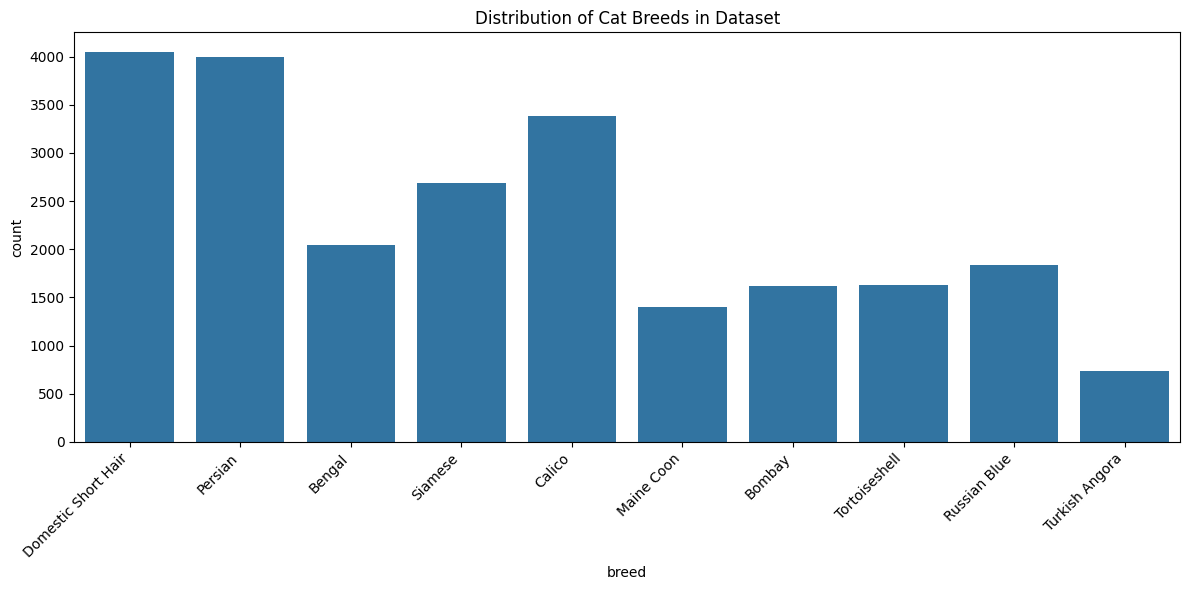

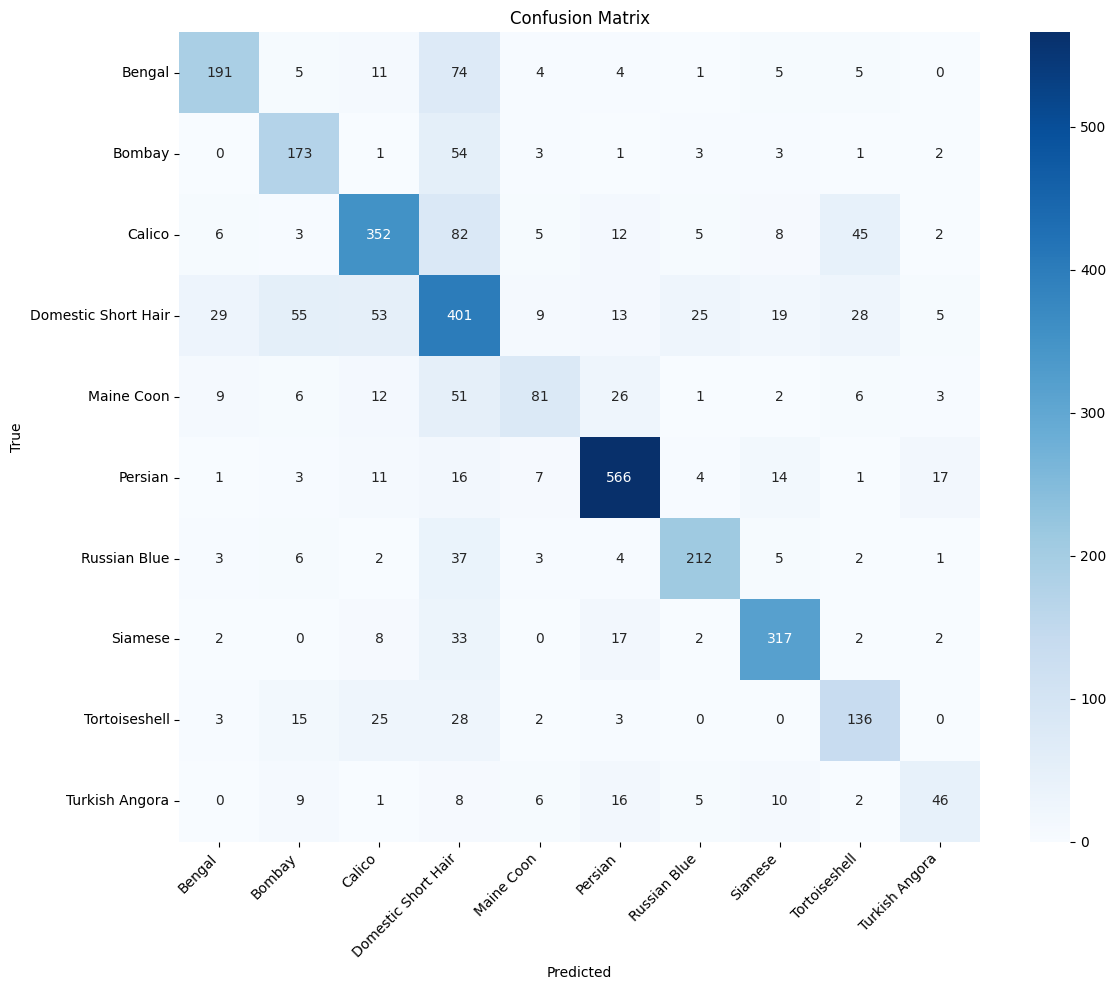


Classification Report:
                     precision    recall  f1-score   support

             Bengal       0.78      0.64      0.70       300
             Bombay       0.63      0.72      0.67       241
             Calico       0.74      0.68      0.71       520
Domestic Short Hair       0.51      0.63      0.56       637
         Maine Coon       0.68      0.41      0.51       197
            Persian       0.85      0.88      0.87       640
       Russian Blue       0.82      0.77      0.80       275
            Siamese       0.83      0.83      0.83       383
      Tortoiseshell       0.60      0.64      0.62       212
     Turkish Angora       0.59      0.45      0.51       103

           accuracy                           0.71      3508
          macro avg       0.70      0.66      0.68      3508
       weighted avg       0.71      0.71      0.71      3508



In [56]:
# Plot results
plot_training_results(processed_df, all_preds, all_labels, label_to_breed)

# Save the model
torch.save({
    'model_state_dict': model.state_dict(),
    'breed_to_label': breed_to_label,
    'label_to_breed': label_to_breed
}, 'cat_breed_classifier.pth')

